In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
df = pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
emp_df = df.copy()

emp_df.shape

(32561, 15)

In [4]:
# featues:
emp_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
# An high-level overview on the dataset
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# some statistical values in numeric features
emp_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# look at the features' data types
emp_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [8]:
# data types exploratoin
emp_df.select_dtypes(exclude=['object', 'category']).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [9]:
emp_df['workclass'].value_counts()
# emp_df['workclass'].unique()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
# replace '?' by NaN
emp_df['workclass'].replace(' ?', np.nan, inplace=True)

In [11]:
emp_df['education'].value_counts()


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [12]:
emp_df['marital-status'].value_counts()


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [13]:
emp_df['occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
# replace ' ?' by Nan
emp_df['occupation'].replace(' ?', np.nan, inplace=True)
emp_df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [15]:
emp_df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [16]:
emp_df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [17]:
emp_df['native-country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
# replace ' ?' by NaN
emp_df['native-country'].replace(' ?', np.nan, inplace=True)
emp_df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [19]:
emp_df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [20]:
# display the rows where 'workclass' is NaN
rows_with_workclass_na = emp_df[emp_df['workclass'].isnull()]
rows_with_workclass_na.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


In [21]:
emp_df['workclass'].mode()


0     Private
Name: workclass, dtype: object

In [22]:
# occupations where 'workclass' is ' Private'
temp = emp_df['occupation'][emp_df['workclass']==' Private']

temp.mode()

0     Craft-repair
Name: occupation, dtype: object

In [23]:
emp_df['workclass'].fillna(emp_df['workclass'].mode()[0], inplace=True)
emp_df['workclass'].isnull().sum()

0

In [24]:
emp_df['occupation'].fillna(' Craft-repair', inplace=True)
emp_df['occupation'].isnull().sum()

0

In [25]:
emp_df['native-country'].fillna(emp_df['native-country'].mode()[0], inplace=True)
emp_df['native-country'].isnull().sum()


0

In [26]:
emp_df.isnull().sum().sum()


0

C:\Users\DataProgNet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salary Distribution')

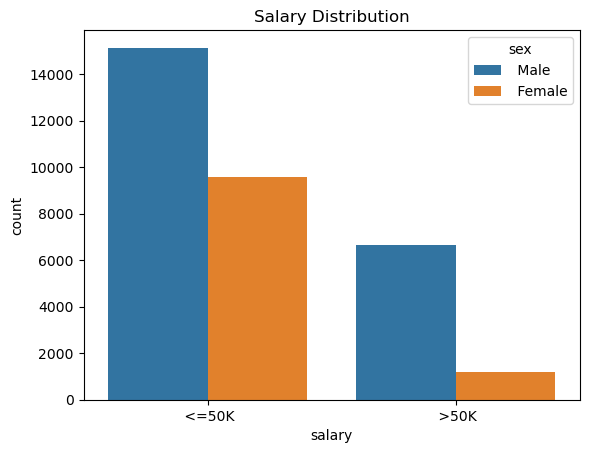

In [27]:
# How the target variable is distributed
ax = sns.countplot(emp_df['salary'], hue=emp_df['sex'])
ax.set_title('Salary Distribution')

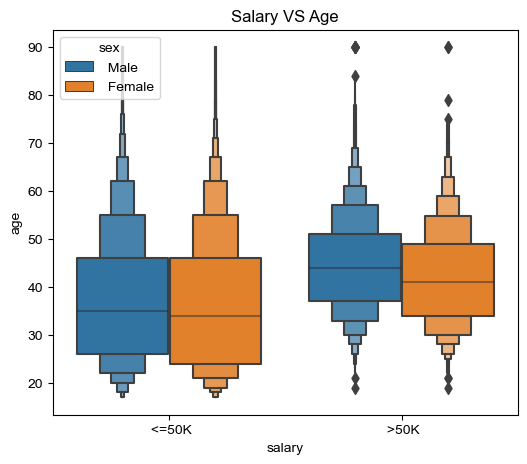

In [28]:
def draw_boxen_plot(feature, hue=None):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    sns.boxenplot(data=emp_df, x='salary', y=feature, ax=ax, hue=hue)
    sns.set_style('whitegrid')
    ax.set_title('Salary VS '+feature.title())
# Salary VS Age
draw_boxen_plot('age', 'sex')

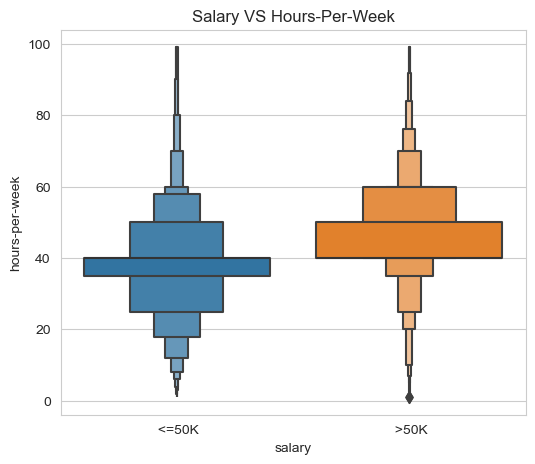

In [29]:
# hours-per-week VS Salary
draw_boxen_plot('hours-per-week')

Text(0.5, 1.0, 'Sex VS Salary')

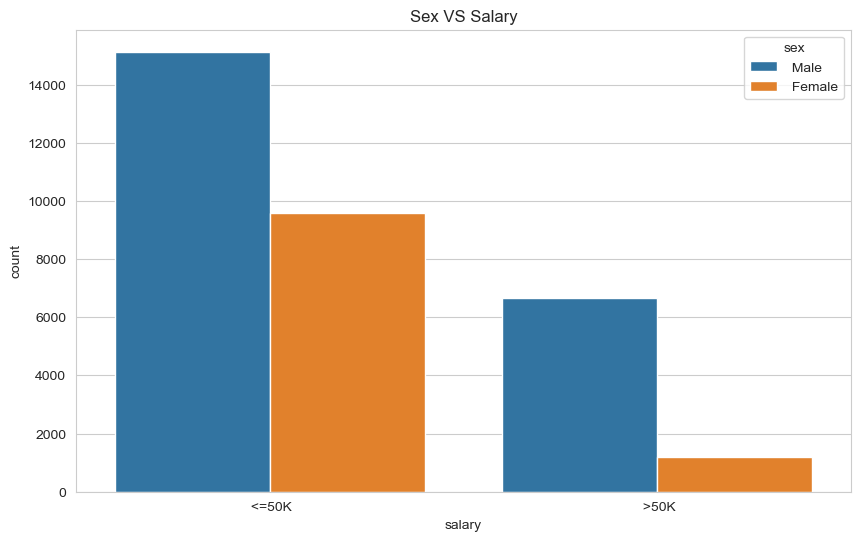

In [30]:
# Sex VS Salary
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=emp_df,x='salary', hue='sex')
ax.set_title('Sex VS Salary')

Text(0.5, 1.0, 'Workclass VS Salary')

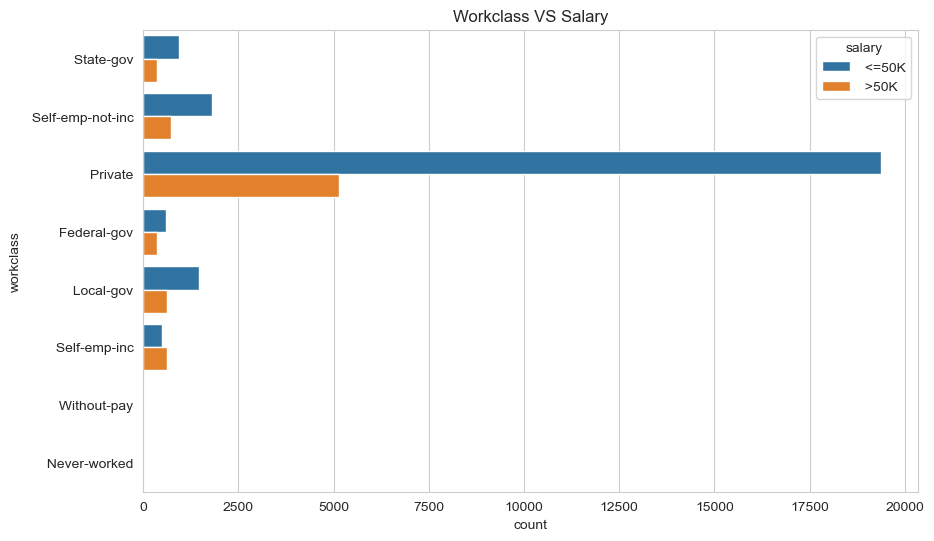

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=emp_df,y='workclass', hue='salary')
ax.set_title('Workclass VS Salary')

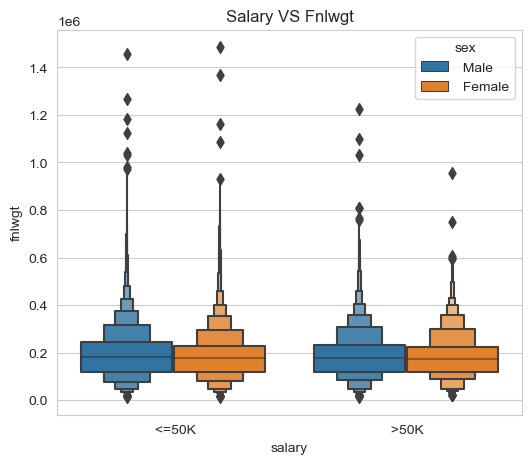

In [32]:
draw_boxen_plot('fnlwgt', 'sex')


Text(0.5, 1.0, 'Education VS Salary')

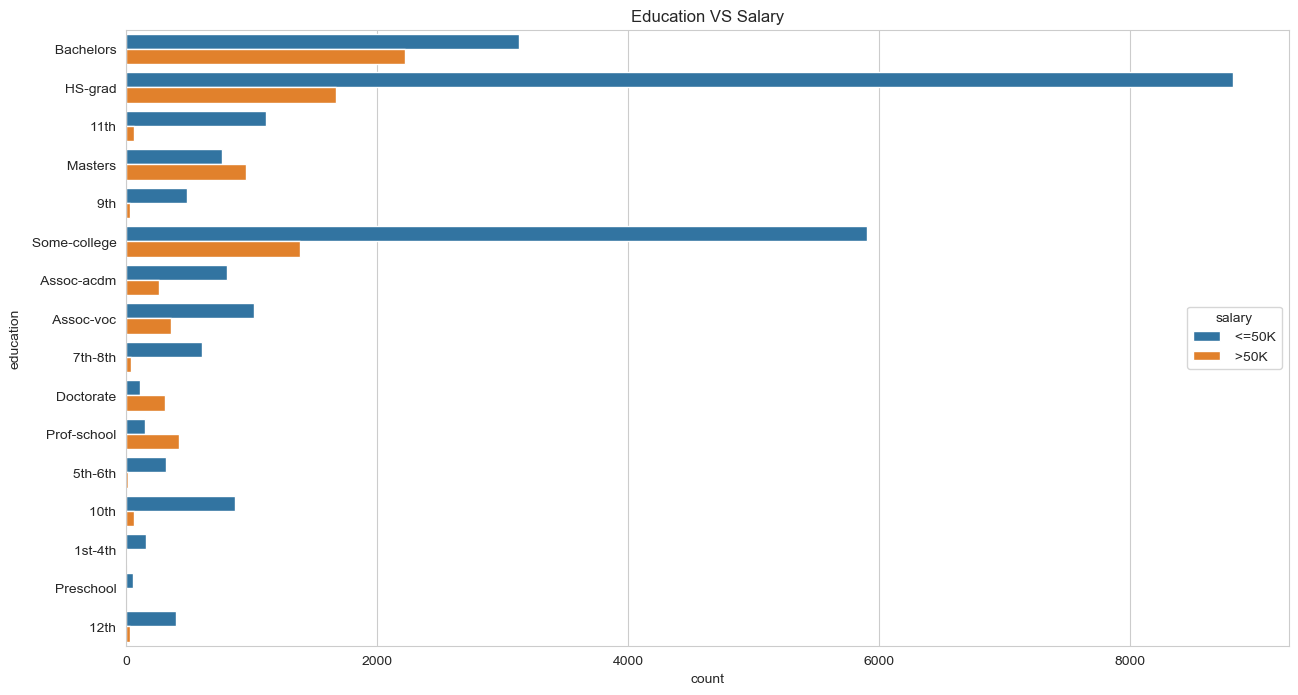

In [33]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=emp_df,y='education', hue='salary')
ax.set_title('Education VS Salary')

Text(0.5, 1.0, 'Race VS Salary')

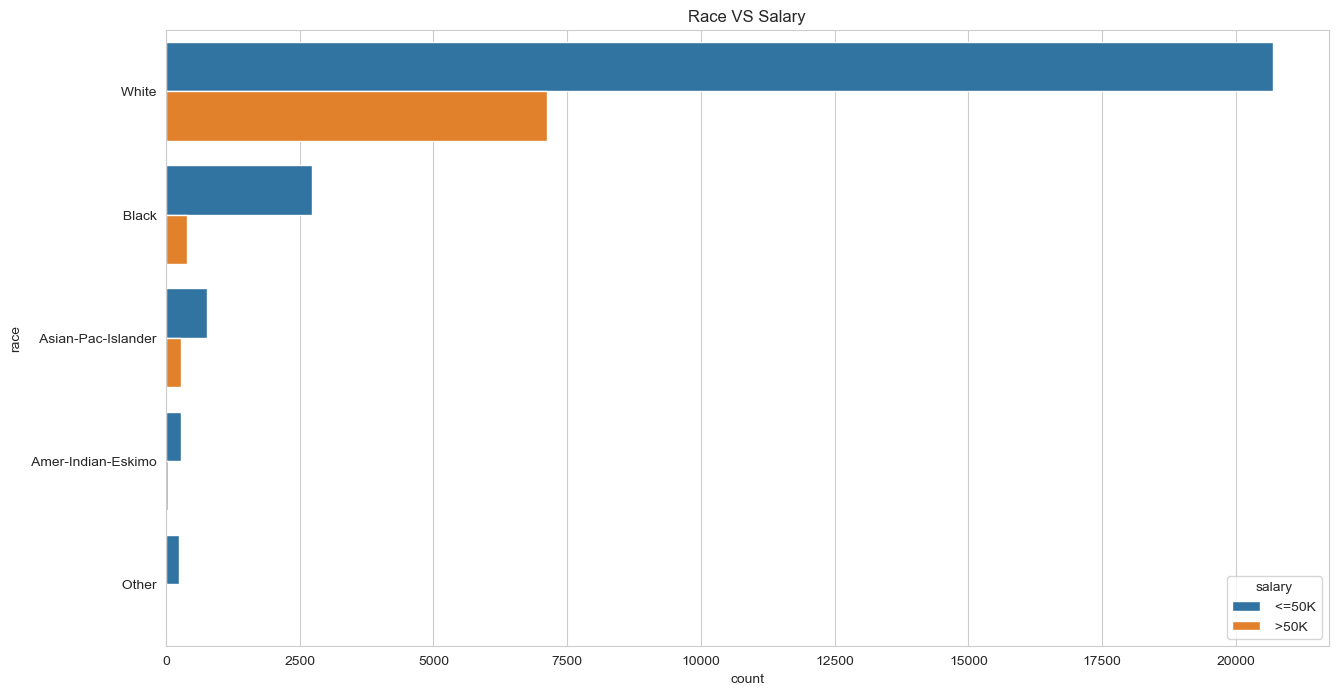

In [34]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=emp_df,y='race', hue='salary')
sns.set_palette('Accent_r')
ax.set_title('Race VS Salary')

In [35]:
emp_df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

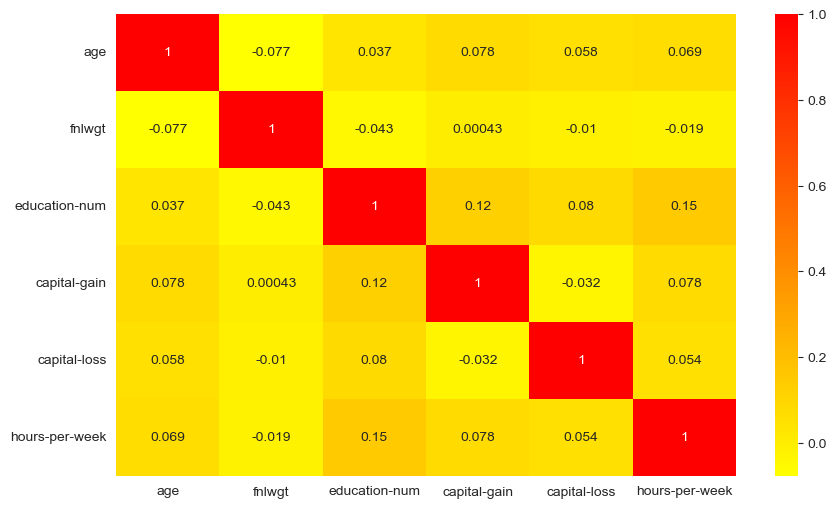

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(emp_df.corr(), annot=True, cmap='autumn_r')

In [37]:
def crosstab_counts(feature, normalize=False):
    return pd.crosstab(
        index=emp_df[feature],
        columns='Counts(%)',
        normalize=normalize
    ).apply(lambda x: round(x*100, 4)).sort_values(by='Counts(%)', ascending=False)
crosstab_counts('salary', True).T

salary,<=50K,>50K
col_0,,
Counts(%),75.919,24.081


In [38]:
crosstab_counts('sex', True).T

sex,Male,Female
col_0,,
Counts(%),66.9205,33.0795


In [39]:
# workclass counts
crosstab_counts('workclass', True).T

workclass,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
col_0,,,,,,,,
Counts(%),75.3417,7.8038,6.4279,3.9864,3.4274,2.9483,0.043,0.0215


In [40]:
# education counts
crosstab_counts('education', True)

col_0,Counts(%)
education,
HS-grad,32.2502
Some-college,22.3918
Bachelors,16.4461
Masters,5.2916
Assoc-voc,4.2443
11th,3.6086
Assoc-acdm,3.2769
10th,2.8654
7th-8th,1.9840


In [41]:
# marital-status counts
crosstab_counts('marital-status', True).T

marital-status,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
col_0,,,,,,,
Counts(%),45.9937,32.8092,13.6452,3.1479,3.0497,1.2837,0.0706


In [42]:
# relationship count
crosstab_counts('relationship', True).T

relationship,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
col_0,,,,,,
Counts(%),40.5178,25.506,15.5646,10.5832,4.8156,3.0128


In [43]:
crosstab_counts('race', True).T

race,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
col_0,,,,,
Counts(%),85.4274,9.5943,3.1909,0.9551,0.8323


In [44]:
# Sex vs salary
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['sex'],
    margins=True,
    normalize=True
)

sex,Female,Male,All
salary,,,
<=50K,0.294586,0.464605,0.75919
>50K,0.036209,0.204601,0.24081
All,0.330795,0.669205,1.00000


In [45]:
# Race vs salary
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['race'],
    margins=True,
    normalize=True
)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
salary,,,,,,
<=50K,0.008446,0.023433,0.084058,0.007555,0.635699,0.75919
>50K,0.001106,0.008476,0.011885,0.000768,0.218574,0.24081
All,0.009551,0.031909,0.095943,0.008323,0.854274,1.00000


In [46]:
# Relationship vs salary
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['relationship'],
    margins=True,
    normalize=True
)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
salary,,,,,,,
<=50K,0.223427,0.228771,0.028992,0.153589,0.099137,0.025276,0.75919
>50K,0.181751,0.026289,0.001136,0.002058,0.006695,0.022880,0.24081
All,0.405178,0.255060,0.030128,0.155646,0.105832,0.048156,1.00000


In [47]:
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['sex'],
    margins=True
)

sex,Female,Male,All
salary,,,
<=50K,9592,15128,24720
>50K,1179,6662,7841
All,10771,21790,32561


In [48]:
emp_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [49]:
emp_df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [50]:
# convert >50k to 1 and <=50k to 0
emp_df['salary'] = emp_df['salary'].map({' >50K': 1, ' <=50K': 0})
X = emp_df.iloc[:, :-1]
y = emp_df['salary']
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    X1 = X.copy()
    # make sure that all discrete features be converted to numbers
    for i in X1.select_dtypes('object').columns:
        X1[i], _ = X1[i].factorize()
    mi_score = mutual_info_regression(X1, y)
    return pd.Series(mi_score, name='MI Score', index=X1.columns).sort_values(ascending=False)

In [51]:
mi_score = get_mi_score(X, y)
mi_score

relationship      0.065847
education-num     0.062511
age               0.058106
hours-per-week    0.038433
capital-gain      0.038117
sex               0.019310
marital-status    0.017877
education         0.014762
capital-loss      0.008727
workclass         0.008580
occupation        0.006382
fnlwgt            0.003733
race              0.000877
native-country    0.000415
Name: MI Score, dtype: float64

[Text(0.5, 1.0, 'MI Scores')]

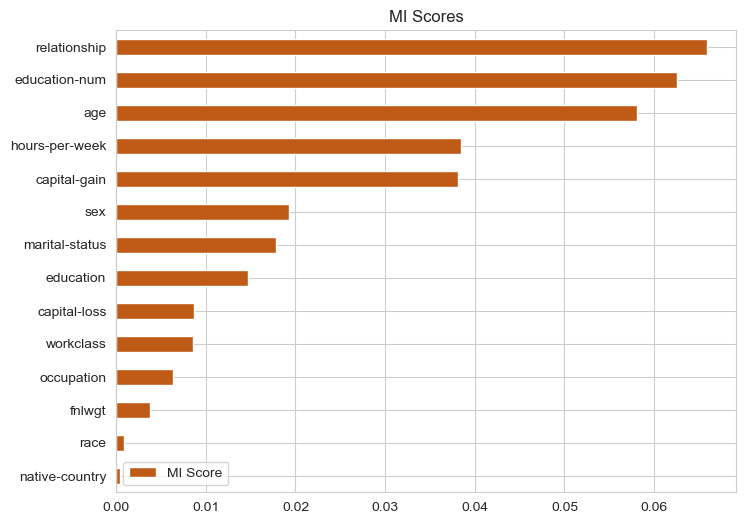

In [52]:
# plot mi scores
mi_score = pd.DataFrame(mi_score).sort_values(by='MI Score')
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
mi_score.plot.barh(ax=ax)
ax.set(title='MI Scores')

In [53]:
# remove two features with lowest mi scores, almost 0
fs = ['native-country', 'fnlwgt']
X.drop(fs, axis=1, inplace=True)
del fs # delete fs variable
# convert categories into numbers
for i in X.select_dtypes('object').columns:
    X[i], _ = X[i].factorize()
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,0,0,13,0,0,0,0,0,2174,0,40
1,50,1,0,13,1,1,1,0,0,0,0,13
2,38,2,1,9,2,2,0,0,0,0,0,40
3,53,2,2,7,1,2,1,1,0,0,0,40
4,28,2,0,13,1,3,2,1,1,0,0,40


In [54]:
X.dtypes

age               int64
workclass         int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [55]:
# spilt the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [56]:
# fit the model
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=0, max_iter=X.shape[0])
logR.fit(X_train, y_train)

LogisticRegression(max_iter=32561, random_state=0)

In [57]:
# predict
y_pred = logR.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7795,  442],
       [1467, 1150]], dtype=int64)

In [59]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  82.4120140040538


In [60]:
# fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [61]:
# predict
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7623,  614],
       [ 997, 1620]], dtype=int64)

In [63]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  85.1575456053068


In [64]:
# Let's first find the best value for K. In this case for 'n_neighbors' argument
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
scores = pd.DataFrame(pd.Series(scores, index=[1,3,5,7,9], name='scores'))\
    .sort_values(by='scores', ascending=False)
scores

C:\Users\DataProgNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DataProgNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

,scores
9,0.837571
7,0.831583
5,0.829924
3,0.825041
1,0.813249


In [65]:
# fit the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [66]:
# predict
y_pred = knn.predict(X_test)
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

C:\Users\DataProgNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[7514,  723],
       [1040, 1577]], dtype=int64)

In [67]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  83.75714022480192
